Author: Kiril Klein

In [7]:
import sys
sys.path.append('../')

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import toolbox as tb
from toolbox import fits, vis
from toolbox import as_toolbox as ast
from toolbox.vis import Color_palette as Color_p
import urllib
from scipy import stats
from toolbox.ExternalFunctions import NLLH

In [19]:
import importlib
_=importlib.reload(vis)

# Problem 1 {.unnumbered}

## Problem 1a/1b {.unnumbered}

In [21]:
Data = pd.DataFrame( ast.load_url_data(
    "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2016/data/Exam_Prob1.txt"))
Data.head(3)

,0,1,2,3,4
0,1.252181,0.435551,2.0,0.787337,1.035054
1,0.631197,-0.242014,4.0,1.522948,1.689663
2,1.783390,0.306556,3.0,2.452806,2.649768


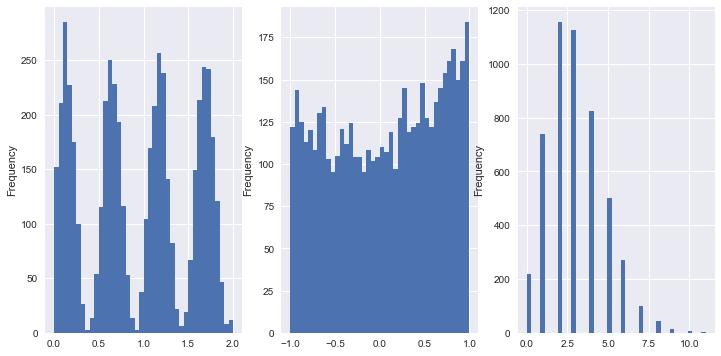

In [22]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,3, figsize = (12,6))
ax = ax.flatten()
for i in range(3):
    Data.iloc[:,i].plot.hist( legend=False, bins = 40, ax = ax[i])

In [23]:
#Test all 3 pdfs for the first column
def f01(x, a): return (np.sin(a*x)+1)/(2- np.cos(2*a)/a+1/a)
def f02(x, a): return (np.sin(a*x)**2)/( (4*a-np.sin(4*a))/(4*a)  )
def f03(x, a): return np.sin(a*x + 1)**2/(-(np.sin(4*a+2)-4*a-np.sin(2))/(4*a))
#Second column is:
def f1(x, a, b): return (1+ a*x + b*x**2)/(2+2/3*b)
#For the third column we have poisson, binomial, maybe logarithmic
def f20(x, lam): return stats.poisson.pmf(x, lam)
def f21(x, n, p): return stats.binom.pmf(x, n, p)
def f22(x, p): return -p**x/(np.log(1-p)*x)

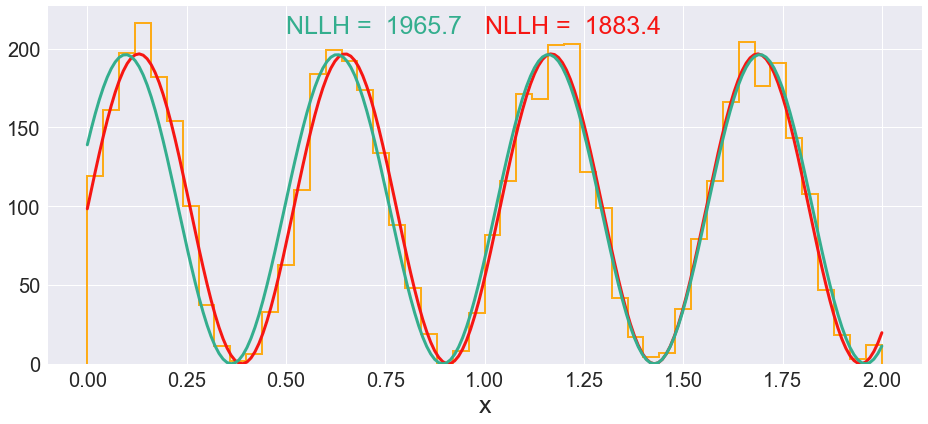

In [24]:
#Lets perform likelihood fits for the functions that might be suitable
nbins = 50
dt01 = fits.hist_fit(
    f01, Data.iloc[:,0], [12], x_range = None, fit_type = 'ullh',
    observed = True, print_level = 0)
a01 = dt01['minuit_obj'].values[0]
dt03 = fits.hist_fit(
    f03, Data.iloc[:,0], [6], x_range = None, fit_type = 'ullh',
    observed = True, print_level = 0)
a03 = dt03['minuit_obj'].values[0]

fig, ax = plt.subplots(figsize = (13,6))
fd = vis.nice_histogram(Data.iloc[:,0], nbins, axis = ax, figure = fig)
xaxis = np.linspace(0,2,200)
fig, ax = vis.nice_plot(xaxis, f01(xaxis, a01)*len(Data)*fd['binwidth'], 
                       axis = fd['ax'], figure = fd['fig'], color = (2,0))
fig, ax = vis.nice_plot(xaxis, f03(xaxis, a03)*len(Data)*fd['binwidth'], 
                       axis = ax, figure = fig, color = (2,2))
#Both seem to fit reasonably well
LLh01 = dt01['minuit_obj'].fval
ax.text(1, 210, f"NLLH =  {LLh01:2.1f}", color = Color_p(2)[0],fontsize = 25)
LLh03 = dt03['minuit_obj'].fval
ax.text(.5, 210, f"NLLH =  {LLh03:2.1f}", color = Color_p(2)[2],fontsize = 25)

fig

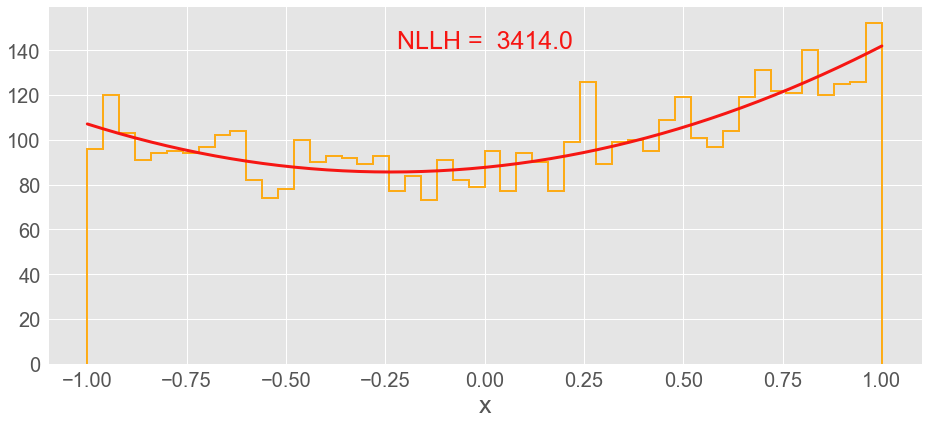

In [25]:
#Lets perform likelihood fits for the functions that might be suitable
nbins = 50
dt1 = fits.hist_fit(
    f1, Data.iloc[:,1], [1,1], x_range = None, fit_type = 'ullh',
    observed = True, print_level = 0)
a1 = dt1['minuit_obj'].values[0]
b1 = dt1['minuit_obj'].values[1]
fig, ax = plt.subplots(figsize = (13,6))
fd = vis.nice_histogram(Data.iloc[:,1], nbins, axis = ax, figure = fig)
xaxis = np.linspace(-1,1,200)
fig, ax = vis.nice_plot(xaxis, f1(xaxis, a1, b1)*len(Data)*fd['binwidth'], 
                       axis = fd['ax'], figure = fd['fig'], color = (2,0))
#Both seem to fit reasonably well
LLh1 = dt1['minuit_obj'].fval
ax.text(.5,.9, f"NLLH =  {LLh1:2.1f}", color = Color_p(2)[0],fontsize = 25,
       horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
fig

600357.1799867309


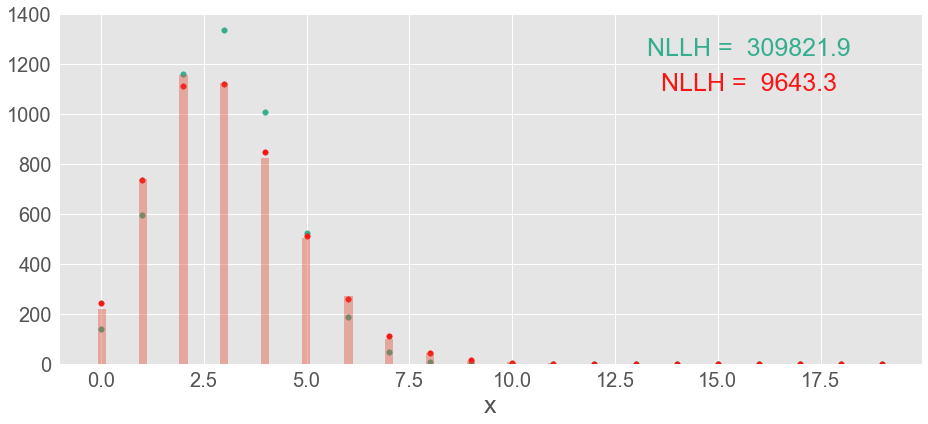

In [30]:
#Lets perform likelihood fits for the functions that might be suitable
nbins = 50
xaxis = np.arange(20)
dt20 = fits.hist_fit(
    f20, Data.iloc[:,2], [2], x_range = None, 
    fit_type = 'ullh', print_level = 0, observed = True)
lam = dt20['minuit_obj'].values[0]

dt21 = fits.hist_fit(
    f21, Data.iloc[:,2], [10,.2], x_range = None, 
    fit_type = 'ullh', print_level = 0, observed = True)
n = dt21['minuit_obj'].values[0]
p = dt21['minuit_obj'].values[1]

fig, ax = plt.subplots(figsize = (13,6))
fig, ax = vis.nice_plot(xaxis, f21(xaxis, n,p)*len(Data), scatter=True,
                       axis = ax, figure = fig, color = (2,2), show_plot=False)
fig, ax = vis.nice_plot(xaxis, f20(xaxis, lam)*len(Data), scatter=True, 
                       axis = ax, figure = fig, color = (2,0), show_plot=False)
#Both seem to fit reasonably well
LLh0 = dt20['minuit_obj'].fval
ax.text(.8,.8, f"NLLH =  {LLh0:2.1f}", color = Color_p(2)[0],fontsize = 25,
       horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
LLh1 = dt21['minuit_obj'].fval
DLLH = 2* (LLh1-LLh0)
print(DLLH)
ax.text(.8,.9, f"NLLH =  {LLh1:2.1f}", color = Color_p(2)[2],fontsize = 25,
       horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
x,y, bw = fits.produce_hist_values(Data.iloc[:,2],200)
ax.bar(x,y, alpha = .4, width = .2)
fig

# Problem 2 {-}

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [115]:
data = pd.DataFrame(ast.load_url_data(
    "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2016/data/breast-cancer-wisconsin_train-test.txt"))
data_dict = {2.0:0, 4.0:1}
data['diag'] = data[10].map(data_dict)
X = np.array(data.iloc[:,1:-2])
y = np.array(data.iloc[:,-1])
#Separate in train and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=.1, random_state=1, shuffle = True)
#sns.pairplot(data.iloc[:,:], hue="diag", height=2.5, corner = True)

In [116]:
n_splits = 5
Val_score, Train_score = np.empty(n_splits), np.empty(n_splits)
Depths = np.arange(1,5)
N_estimators = np.arange(30,90,10)
DD, NN = np.meshgrid(Depths, N_estimators)
Val_score_mean = np.empty((len(Depths), len(N_estimators)))
Train_score_mean = np.copy(Val_score_mean) 
# fit model no training data
for i, depth in enumerate(Depths):
    for j, n_est in enumerate(N_estimators):
        #Lets see how the model performs in a k-fold cross validation
        kf = KFold(n_splits=n_splits, random_state=2, shuffle=True)
        for k, Indices in enumerate(kf.split(X_train_val)):
            #print(k)
            train_index = Indices[0]
            val_index = Indices[1]
            #print(Indices.shape)
            X_train, X_val = X_train_val[train_index,:], X_train_val[val_index,:]
            y_train, y_val = y_train_val[train_index], y_train_val[val_index]
            clf = GradientBoostingClassifier(
                n_estimators=n_est, learning_rate=1.0,
                max_depth=depth, random_state=0).fit(X_train, y_train)
            Val_score[k] = clf.score(X_val, y_val)
            Train_score[k] = clf.score(X_train, y_train)
            #feature_importance = clf.feature_importances_
            #feat_imp_ind = np.argsort(feature_importance)[::-1]
            #print(X.columns[feat_imp_ind], feature_importance[feat_imp_ind])
        Train_score_mean[i,j] = np.mean(Train_score)
        Val_score_mean[i,j] = np.mean(Val_score)

![This is the caption\label{fig:mylabel}](example.png)

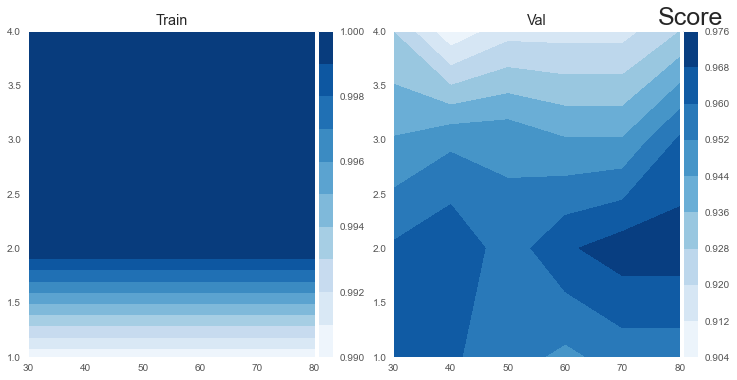

In [117]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
im0 = ax[0].contourf( NN.T, DD.T, Train_score_mean, label='Train', cmap = 'Blues', levels = 10)
im1 = ax[1].contourf( NN.T, DD.T, Val_score_mean, label = 'Val', cmap = 'Blues', levels = 10)
ax[0].set_title('Train')
ax[1].set_title('Val')
#ax[0].set_xlabel('')
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im0, cax=cax0)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
plt.title('Score', fontsize = 25)
fig.savefig('example.png')

We choose two classifiers and a depth of 40

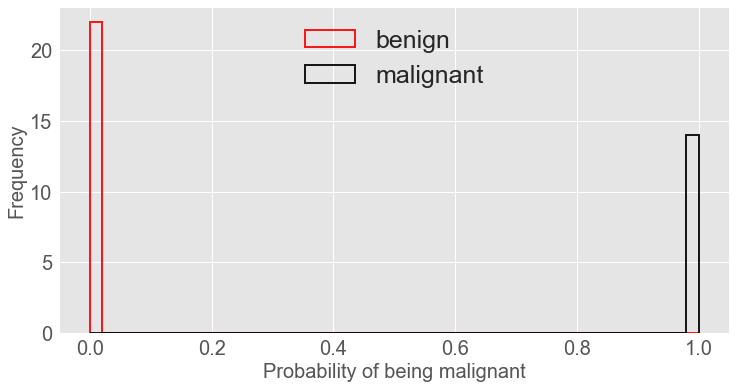

In [118]:
clf_final = GradientBoostingClassifier(
                n_estimators=80, learning_rate=1.0,
                max_depth=2, random_state=0).fit(X_train, y_train)
X_b = X_val[y_val==0]#low
X_m = X_val[y_val==1]#high
ds_b = clf_final.predict_proba(X_b)[:,1]
ds_m = clf_final.predict_proba(X_m)[:,1]
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)

fd = vis.nice_histogram(
    ds_b, np.linspace(0,1,50), color_hist='r', data_label_hist='benign')
fig = fd['fig']
ax = fd['ax']
#ax.axvline(cut,0, 150, label = 'Cut', color = 'blue')
fd = vis.nice_histogram(
    ds_m, np.linspace(0,1,50), color_hist='k', figure = fig, axis = ax, plot_legend=True,
    data_label_hist='malignant', xlabel="Probability of being malignant", legend_fs=25, 
    save = False, figname = "FHistogram1a.pdf", legend_loc=9 )
fig = fd['fig']
fig

# Problem 3 {-} 

In [185]:
from toolbox import as_toolbox as ast
importlib.reload(ast)

<module 'toolbox.as_toolbox' from '..\\toolbox\\as_toolbox.py'>

In [130]:
#load data
data = ast.load_url_data(
    'https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2016/data/Exam_Prob3.txt')

([array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
          1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
          1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
          2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
          2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
          3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
          3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
          4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
          4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
          5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
          5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
          6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
          6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
          6.90909091,  7.        ,  7.

In [200]:
def f_likelihood(x, f):
    N = (np.sin(10*f)-np.sin(f))/f + 9 + np.log(1331/8)
    return 1/N * (np.cos(x*f) + 3/(x+1) + 1)
#f_nllh = ast.NLLH(f_likelihood, data)
def f_nllh(f): return ast.NLLH_scan(f_likelihood, data)(f)[1]
def f_prior(f): return stats.norm.pdf(f, loc = 15, scale = 0.5)
def f_log_posterior(f): return -np.log(f_prior(f))-f_nllh(f)
def f_proposal(size): return stats.norm.rvs(loc = 0, scale = 2, size = size)

In [ ]:
def MCMH(log_post, prop, Theta0, num_iter = 1000, nwalkers = 10, burn_in = 100):
    if num_iter<burn_in:
        raise ValueError('num_iter should be larger than burn_in')
    if type(Theta0==float) or type(Theta0==int):
        Theta0 = Theta0*np.ones(nwalkers)
    Theta_arr = np.empty((num_iter,nwalkers))
    for i in range(num_iter):
        Theta_prop = Theta0+prop(size = nwalkers)
        rand = np.random.uniform(size = nwalkers)
        accept_mask = post(Theta_prop)/post(Theta0)>rand
        Theta0[accept_mask] = Theta_prop[accept_mask]
        Theta_arr[i, accept_mask] = Theta0[accept_mask]
        Theta_arr[i, ~accept_mask] = Theta0[~accept_mask]
    Theta_arr = Theta_arr[burn_in:,:].reshape(-1)
    return Theta_arr

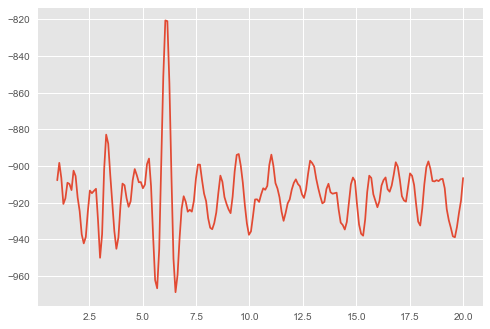

In [221]:
xaxis = np.linspace(1,20,200)
plt.plot(xaxis, -f_nllh(xaxis))
#plt.plot(xaxis, f_log_posterior(xaxis))
#plt.plot(xaxis, -np.log(f_prior(xaxis)))
#plt.hist(F_arr)

In [207]:
F_arr = ast.MCMH(f_log_posterior, f_proposal, stats.norm.rvs(14,1,size = 4),
                 500, nwalkers=4, burn_in=100)

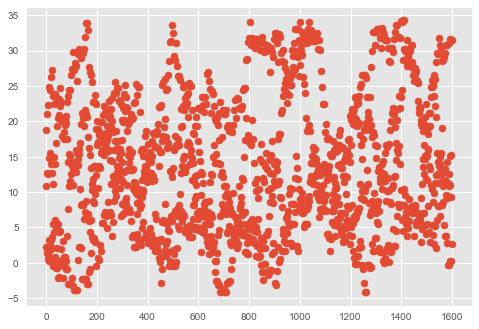

In [208]:
plt.scatter(np.arange(len(F_arr)), F_arr )